# Comparing Telecom Plans

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Intoduction** 
The purpose of this project is to compare two plans, Surf and Ultimate, to determine which plan brings in more revenue for Megaline company. As part of this project, the data will be cleaned, exploratory analysis conducted to consider customer use of the plans and customer behavior across both plans, and statistical analysis conducted to determine any differences between revenue from the two plans and whether those differences are statistically significant or not.

## 1 Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from scipy import stats as st

## 2 Load Data

In [2]:
# Load the data 

calls = pd.read_csv('~/Projects/TT_S3/megaline_calls.csv')

internet = pd.read_csv('~/Projects/TT_S3/megaline_internet.csv')

messages = pd.read_csv('~/Projects/TT_S3/megaline_messages.csv')

plans = pd.read_csv('~/Projects/TT_S3/megaline_plans.csv')

users = pd.read_csv('~/Projects/TT_S3/megaline_users.csv')

In [3]:
# Checking data loaded properly for each data set, e.g., columns separated appropriately

print('calls')
print(calls.columns)
display(calls.head(2))
print()
print('internet')
print(internet.columns)
display(internet.head(2))
print()
print('messages')
print(messages.columns)
display(messages.head(2))
print()
print('plans')
print(plans.columns)
display(plans.head(2))
print()
print('users')
print(users.columns)
display(users.head(2))


calls
Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66



internet
Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00



messages
Index(['id', 'user_id', 'message_date'], dtype='object')


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31



plans
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



users
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


## 3 Prepare Data

For each data set, the next several steps will look at overall information for the data, fixing obvious issues with data type, missing or duplicate data as appropriate for the specific data set, and creating new columns as relevant for merging data sets or for analysis.

### 3.1 Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Print a sample of data for plans
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This data set contains only two rows that give basic information on the two plans that are part of the analysis: Ultimate and Surf. The data types are appropriate for each column, and there are no obvious issues with the data set. It may be advantageous to change the plan_name column from an object data type to category for more efficient processing.

In [6]:
# Changing data type to categorical for plan_name
plans['plan_name'] = plans['plan_name'].astype('category')

# Reprinting info and data set to confirm change
plans.info()
plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int64(5)
memory usage: 370.0 bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### 3.2 Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

# Checking for user id duplicates
print()
print('User ID duplicates:', users.duplicated('user_id').sum())
print()

# checking if any users have both plans over time
users_surf = users.query('plan == "surf"')

users_ultimate = users.query('plan == "ultimate"')
users_ultimate = users_ultimate['user_id']

print('Users with both plans over time:', users_surf[users_surf['plan'].isin(users_ultimate)]['user_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

User ID duplicates: 0

Users with both plans over time: Series([], Name: user_id, dtype: int64)


In [8]:
# Print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
436,1436,Jennine,Kinney,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-26,ultimate,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN
478,1478,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaN
214,1214,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaN


The only column with missing data, 'churn', is expected to include missing values, as this indicates individuals actively using their plan. There are no user_id duplicates, the main column where duplicates would be an issue. The data is a mix of object and numeric data, which is appropriate for most categories except for the date columns (reg_date and churn_date). The plan column could be changed to categories rather than object given they should only include two values (Surf or Ultimate). No users change plans from Surf to Ultimate over time.

In [9]:
# Changing data type to date-time for relevant columns
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [10]:
# Changing data type to categorical for plans within user data and reprinting info/sample to confirm change
users['plan'] = users['plan'].astype('category')
    
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaT
274,1274,Dudley,Massey,53,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-10,ultimate,NaT
309,1309,Winfred,Zimmerman,19,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-04,surf,NaT
464,1464,Burt,Burke,70,"Providence-Warwick, RI-MA MSA",2018-11-07,surf,NaT
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaT


Data include integer, object, date-time and categorical data types as appropriate for individual columns.

### 3.3 Calls

In [11]:
# Print the general/summary information about the calls' DataFrame and checking for duplicates
calls.info()
print()
print('Duplicates:', calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

Duplicates: 0


In [12]:
# Print a sample of data for calls
calls.sample(5)

,id,user_id,call_date,duration
47097,1171_128,1171,2018-09-10,8.81
121271,1426_59,1426,2018-11-25,2.37
86526,1320_195,1320,2018-05-19,12.90
88304,1324_353,1324,2018-09-16,13.91
80122,1288_57,1288,2018-12-28,5.22


There are no missing data in the data set, nor duplicated rows. The call_date column should be changed to be a date-time data type, but other columns generally have appropriate data types. Per plans, calls are rounded up to the nearest minute, so this could be included in the data set for analysis purposes. For later analysis and data merging, including month as a stand alone variable will be useful.

In [13]:
# Changing call_date to date-time data type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [14]:
# Extracting the month as its own column for later analysis

# First checking if multiple years worth of data
calls['year'] = calls['call_date'].dt.year
print(calls['year'].value_counts())
print()

# Confirmed only 2018 data so extracting month as its own column
calls['month'] = calls['call_date'].dt.month

# Rounding duration up as each call is rounded up per the plan
calls['duration_rnd_up'] = calls['duration'].apply(lambda x: math.ceil(x))

# Changing 0 sec calls to 1 min under the assumption that any call would be charged at least 1 min
calls['duration_rnd_up'] = calls['duration_rnd_up'].where(calls['duration_rnd_up'] != 0, 1)

# Confirming updated data set
calls.info()
calls.sample(5)

year
2018    137735
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               137735 non-null  object        
 1   user_id          137735 non-null  int64         
 2   call_date        137735 non-null  datetime64[ns]
 3   duration         137735 non-null  float64       
 4   year             137735 non-null  int32         
 5   month            137735 non-null  int32         
 6   duration_rnd_up  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(1)
memory usage: 6.3+ MB


,id,user_id,call_date,duration,year,month,duration_rnd_up
131053,1470_502,1470,2018-07-22,0.00,2018,7,1
83968,1305_453,1305,2018-09-28,1.21,2018,9,2
104180,1366_389,1366,2018-08-20,9.70,2018,8,10
41403,1153_24,1153,2018-06-26,3.31,2018,6,4
9401,1042_332,1042,2018-04-04,13.88,2018,4,14


Data include float, integer, object, and date-time data types as appropriate for individual columns. New columns were added to a) round up each call per the plan specifics, and b) create a new column for month as a stand alone variable that will be used for later analysis and merging purposes.

### 3.4 Messages

In [15]:
# Print the general/summary information about the messages' DataFrame
messages.info()
print('Duplicates:', messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Duplicates: 0


In [16]:
# Print a sample of data for messages
messages.sample(5)

,id,user_id,message_date
9106,1066_280,1066,2018-11-26
60181,1381_294,1381,2018-11-22
5303,1052_60,1052,2018-11-29
26917,1164_167,1164,2018-09-25
67753,1439_147,1439,2018-12-24


The message_date column should be in a date format, but otherwise there are no obvious issues with the data set (i.e., no missing or duplicate data). As for other data sets, adding a new column for month as a stand alone variable will be helpful for later merging and analysis.

In [17]:
# Changing data type for message_date to date-time
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [18]:
# Extracting the month as its own column for later analysis

# Checking what years are included in the data
messages['year'] = messages['message_date'].dt.year
print(calls['year'].value_counts())
print()

# Confirmed only 2018 data so extracting month as its own column
messages['month'] = messages['message_date'].dt.month

# Confirming updated data set
messages.info()
messages.sample(5)

year
2018    137735
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year          76051 non-null  int32         
 4   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date,year,month
74200,1475_334,1475,2018-11-29,2018,11
30395,1191_100,1191,2018-10-18,2018,10
49320,1328_278,1328,2018-10-26,2018,10
15903,1105_102,1105,2018-11-11,2018,11
17247,1114_15,1114,2018-11-10,2018,11


Data include integer, object, and date-time data types as appropriate for individual columns. A new columns was added for month as a stand alone variable for merging and analysis purposes.

### 3.5 Internet

In [19]:
# Print the general/summary information about the internet DataFrame
internet.info()
print()
print('Duplicated:', internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

Duplicated: 0


In [20]:
# Print a sample of data for the internet traffic
internet.sample(10)

,id,user_id,session_date,mb_used
80268,1374_344,1374,2018-04-30,850.01
97581,1460_144,1460,2018-12-11,464.12
82224,1384_478,1384,2018-10-14,704.79
52909,1239_18,1239,2018-10-27,406.52
40413,1182_63,1182,2018-07-14,481.67
101648,1487_33,1487,2018-12-18,0.00
50507,1225_37,1225,2018-12-31,374.24
15506,1071_88,1071,2018-08-09,892.29
41161,1185_198,1185,2018-09-16,0.00
80576,1377_1,1377,2018-11-25,487.25


The session_date column should be converted to a date specific data type, but there are no other obvious issues with the data set (i.e., no missing or duplicate data). As with other data sets, including month as a stand alone column would be helpful for merging and analysis purposes.

In [21]:
# Changing session_date to date-time data type
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [22]:
# Extracting the month as it's own column for future analysis

# First checking if multiple years worth of data
internet['year'] = internet['session_date'].dt.year
print(internet['year'].value_counts())
print()

# Confirmed only 2018 data so extracting month as its own column

internet['month'] = internet['session_date'].dt.month

# Confirming updated data set
internet.info()
internet.sample(5)

year
2018    104825
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   year          104825 non-null  int32         
 5   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 4.0+ MB


,id,user_id,session_date,mb_used,year,month
9281,1048_160,1048,2018-11-02,683.36,2018,11
7616,1041_456,1041,2018-10-25,13.17,2018,10
46314,1206_56,1206,2018-08-16,433.43,2018,8
81167,1380_120,1380,2018-10-12,1025.03,2018,10
36603,1164_286,1164,2018-07-31,578.46,2018,7


Data include float, integer, object, and datetime data types as appropriate for individual columns. As with other data sets, month was added as its own column to be used for data merging and analysis.

In [23]:
# Print out the plan conditions and make sure they are clear for you

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## 4 Aggregate data per user
Aggregating data for each user to analyse across users for each month and overall. In order to facilitate data merging across data sets, a variable combining user id and relevant month is added to each data set that will later be combined.

In [24]:
# Calculate the number of calls made by each user per month. Save the result.

calls_mth = pd.DataFrame(calls.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'count_calls'}))

# Adding a new field using user id and month for later analysis and printing
calls_mth['uid_month'] = calls_mth['user_id'].astype('str') + '-' + calls_mth['month'].astype('str')

calls_mth.sample(5)

,user_id,month,count_calls,uid_month
2049,1450,12,94,1450-12
1298,1283,12,122,1283-12
1997,1437,11,60,1437-11
1273,1277,9,103,1277-9
1586,1352,11,98,1352-11


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_min = pd.DataFrame(calls.groupby(['user_id', 'month'])['duration_rnd_up'].sum().reset_index().rename(columns={'duration_rnd_up': 'total_duration'}))

# Adding a new field using user id and month for later analysis and printing sample
calls_min['uid_month'] = calls_min['user_id'].astype('str') + '-' + calls_min['month'].astype('str')

calls_min.sample(5)

,user_id,month,total_duration,uid_month
1836,1401,12,652,1401-12
1634,1360,12,838,1360-12
1681,1368,5,299,1368-5
666,1144,11,532,1144-11
1393,1311,10,225,1311-10


In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
mesg_mth = pd.DataFrame(messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'cnt_msgs'}))

# Adding a new field using user id and month for later analysis and printing sample
mesg_mth['uid_month'] = mesg_mth['user_id'].astype('str') + '-' + mesg_mth['month'].astype('str')

mesg_mth.sample(5)

,user_id,month,cnt_msgs,uid_month
417,1120,6,42,1120-6
1200,1327,9,35,1327-9
236,1070,12,17,1070-12
699,1189,10,52,1189-10
1609,1440,6,38,1440-6


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
int_mth = pd.DataFrame(internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()).rename(columns={'mb_used': 'mb_used_total'})

# Converting to GB and rounding up per the plan
int_mth['gb_used_rnd'] = (int_mth['mb_used_total'] / 1024).apply(lambda x: math.ceil(x))

# Adding a new field using user id and month for later analysis
int_mth['uid_month'] = int_mth['user_id'].astype('str') + '-' + int_mth['month'].astype('str')

# confirming updated data set
int_mth.info()
int_mth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2277 non-null   int64  
 1   month          2277 non-null   int32  
 2   mb_used_total  2277 non-null   float64
 3   gb_used_rnd    2277 non-null   int64  
 4   uid_month      2277 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 80.2+ KB


,user_id,month,mb_used_total,gb_used_rnd,uid_month
0,1000,12,1901.47,2,1000-12
1,1001,8,6919.15,7,1001-8
2,1001,9,13314.82,14,1001-9
3,1001,10,22330.49,22,1001-10
4,1001,11,18504.30,19,1001-11


In [28]:
# Merging all aggregated data into one data set

# Merging the data for calls, minutes, messages, internet based on user_id and month
all_data = calls_mth.merge(calls_min, on='uid_month', how='outer', suffixes=['_calls_mth', '_calls_min'])
all_data = all_data.merge(mesg_mth, on='uid_month', how='outer', suffixes=['_x', '_mesg_mth'])
all_data = all_data.merge(int_mth, on='uid_month', how='outer', suffixes=['_x', '_int_mth'])

# pulling user_id data into one column
all_data['user_id'] = all_data['user_id_calls_mth']
all_data['user_id'] = all_data['user_id'].where(all_data['user_id'].isna() == False, all_data['user_id_int_mth'])
all_data['user_id'] = all_data['user_id'].where(all_data['user_id'].isna() == False, all_data['user_id_x'])

# pulling month data into one column
all_data['month'] = all_data['month_calls_mth']
all_data['month'] = all_data['month'].where(all_data['month'].isna() == False, all_data['month_int_mth'])
all_data['month'] = all_data['month'].where(all_data['month'].isna() == False, all_data['month_x'])

# dropping unnecessary/ duplicate columns
all_data = all_data.drop(columns=['user_id_calls_mth', 
                                  'month_calls_mth', 
                                  'user_id_calls_min', 
                                  'month_calls_min', 
                                  'user_id_x',
                                 'month_x',
                                 'user_id_int_mth',
                                 'month_int_mth'])

# changing columns to integers as relevant
all_data['user_id'] = all_data['user_id'].astype('int')
all_data['month'] = all_data['month'].astype('int')

# confirming no missing data for user_id and month columns and printing info/sample to confirm final data set
print('Missing User ID', all_data[all_data['user_id'].isna() == True])
print('Missing month', all_data[all_data['month'].isna() == True])
print()

print(all_data.info())
all_data.sample(5)


Missing User ID Empty DataFrame
Columns: [count_calls, uid_month, total_duration, cnt_msgs, mb_used_total, gb_used_rnd, user_id, month]
Index: []
Missing month Empty DataFrame
Columns: [count_calls, uid_month, total_duration, cnt_msgs, mb_used_total, gb_used_rnd, user_id, month]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   count_calls     2258 non-null   float64
 1   uid_month       2293 non-null   object 
 2   total_duration  2258 non-null   float64
 3   cnt_msgs        1806 non-null   float64
 4   mb_used_total   2277 non-null   float64
 5   gb_used_rnd     2277 non-null   float64
 6   user_id         2293 non-null   int64  
 7   month           2293 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 143.4+ KB
None


,count_calls,uid_month,total_duration,cnt_msgs,mb_used_total,gb_used_rnd,user_id,month
645,102.0,1140-10,884.0,16.0,16832.50,17.0,1140,10
1453,150.0,1324-5,1043.0,124.0,17445.92,18.0,1324,5
432,1.0,1094-10,1.0,NaN,1728.71,2.0,1094,10
834,79.0,1179-8,608.0,19.0,16530.82,17.0,1179,8
1787,27.0,1392-7,208.0,31.0,9697.18,10.0,1392,7


In [29]:
# Adding the plan information and confirming merge was successful
all_data = all_data.merge(users, on='user_id', how='left').drop(columns=['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'])
all_data

,count_calls,uid_month,total_duration,cnt_msgs,mb_used_total,gb_used_rnd,user_id,month,plan
0,16.0,1000-12,124.0,11.0,1901.47,2.0,1000,12,ultimate
1,27.0,1001-8,187.0,30.0,6919.15,7.0,1001,8,surf
2,49.0,1001-9,326.0,44.0,13314.82,14.0,1001,9,surf
3,65.0,1001-10,411.0,53.0,22330.49,22.0,1001,10,surf
4,64.0,1001-11,441.0,36.0,18504.30,19.0,1001,11,surf
...,...,...,...,...,...,...,...,...,...
2288,NaN,1349-12,NaN,61.0,13039.91,13.0,1349,12,surf
2289,NaN,1361-5,NaN,2.0,1519.69,2.0,1361,5,surf
2290,NaN,1482-10,NaN,2.0,NaN,NaN,1482,10,ultimate
2291,NaN,1108-12,NaN,NaN,233.17,1.0,1108,12,ultimate


In [30]:
# Calculating the monthly revenue for each user and printing sample to ensure accurate

def monthly_revenue(row):
    revenue = 0
    
    plan = row['plan']
    total_minutes = row['total_duration']
    total_messages = row['cnt_msgs']
    gb_total = row['gb_used_rnd']
    
    diff_calls = total_minutes - float(plans[plans['plan_name'] == plan]['minutes_included'])
    diff_msg = total_messages - float(plans[plans['plan_name'] == plan]['messages_included'])
    diff_inter = gb_total - (float(plans[plans['plan_name'] == plan]['mb_per_month_included'])/1024)
    
    if diff_calls > 0:
        revenue += diff_calls * float(plans[plans['plan_name'] == plan]['usd_per_minute'])
    if diff_msg > 0:
        revenue += diff_msg * float(plans[plans['plan_name'] == plan]['usd_per_message'])
    if diff_inter > 0:
        revenue += diff_inter * float(plans[plans['plan_name'] == plan]['usd_per_gb'])
        
    revenue += float(plans[plans['plan_name'] == plan]['usd_monthly_pay'])
    
    return revenue
    

all_data['revenue'] = all_data.apply(monthly_revenue, axis=1)

all_data.sample(20, random_state=42)


/var/folders/8j/ph8l8321463cxnzpcxwzrzj80000gn/T/ipykernel_34270/2968934972.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diff_calls = total_minutes - float(plans[plans['plan_name'] == plan]['minutes_included'])
/var/folders/8j/ph8l8321463cxnzpcxwzrzj80000gn/T/ipykernel_34270/2968934972.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diff_msg = total_messages - float(plans[plans['plan_name'] == plan]['messages_included'])
/var/folders/8j/ph8l8321463cxnzpcxwzrzj80000gn/T/ipykernel_34270/2968934972.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diff_inter = gb_total - (float(plans[plans['plan_name'] == plan]['mb_per_month_included'])/1024)
/var/folders/8j/ph8l8321463cxnzpcxwzrzj

,count_calls,uid_month,total_duration,cnt_msgs,mb_used_total,gb_used_rnd,user_id,month,plan,revenue
1875,53.0,1408-2,450.0,29.0,11828.25,12.0,1408,2,surf,20.00
2066,65.0,1456-6,424.0,33.0,12266.66,12.0,1456,6,ultimate,70.00
1314,66.0,1289-11,457.0,29.0,12695.65,13.0,1289,11,ultimate,70.00
1979,58.0,1434-4,400.0,46.0,11664.64,12.0,1434,4,surf,20.00
1429,55.0,1318-12,363.0,47.0,19730.76,20.0,1318,12,surf,70.00
111,69.0,1030-12,435.0,10.0,15567.17,16.0,1030,12,ultimate,70.00
2093,43.0,1461-12,300.0,NaN,11126.94,11.0,1461,12,surf,20.00
420,32.0,1090-5,194.0,19.0,9592.09,10.0,1090,5,surf,20.00
44,95.0,1010-10,728.0,NaN,16937.78,17.0,1010,10,surf,46.84
1777,97.0,1390-7,745.0,NaN,11529.56,12.0,1390,7,ultimate,70.00


Aggregated data per user per month has been combined into one data set to facilitate analysis.

## 5 Study user behavior

The following is an initial analysis comparing Surf and Ultimate plan usage across customers and monthly aggregated averages. This serves to understand potential customer behavioral differences which will contribute to a determination of which plan is more profitable. Similar analysis is conducted for each element of the plans (calls, messages, internet usage) and for overall revenue.

### 5.1 Calls

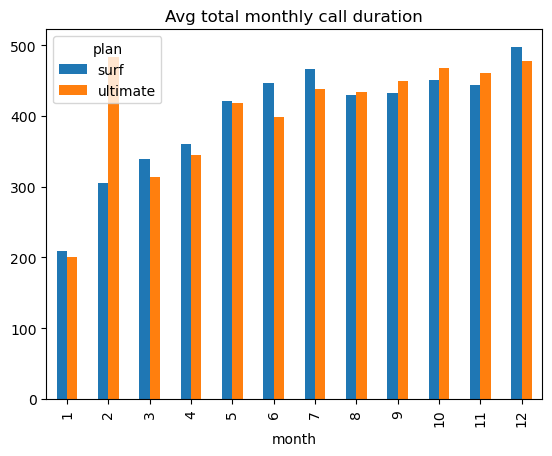

plan,surf,ultimate
month,,
1,209.000000,200.250000
2,304.555556,483.166667
3,338.565217,313.666667
4,360.720000,345.333333
5,421.506667,417.862069
6,447.187500,397.911111
7,465.958333,438.406780
8,429.452830,433.507042
9,432.267016,449.627907


In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

all_data_dur_pivot = pd.DataFrame(all_data.pivot_table(index='plan', 
                                                       columns='month', 
                                                       values='total_duration', 
                                                       aggfunc='mean').T)

all_data_dur_pivot.plot.bar(title='Avg total monthly call duration')
plt.show()

# printing data to confirm bar chart is accurate
all_data_dur_pivot

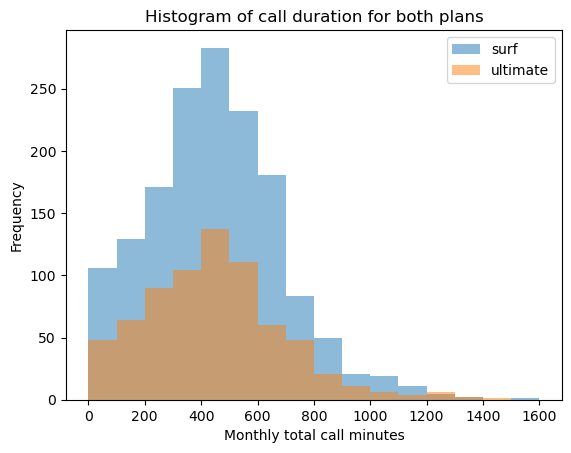

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

all_data_surf = all_data[all_data['plan'] == 'surf']
all_data_ult = all_data[all_data['plan'] == 'ultimate']

plt.hist(all_data_surf['total_duration'], alpha=0.5, bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600])
plt.hist(all_data_ult['total_duration'], alpha=0.5, bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600])

plt.title('Histogram of call duration for both plans')
plt.legend(['surf', 'ultimate'])
plt.ylabel('Frequency')
plt.xlabel('Monthly total call minutes')
plt.show()


In [33]:
# Calculate the mean and the variance of the monthly call duration

print('Average total monthly duration for each', all_data_dur_pivot.mean())
print()
print('Variance for each', all_data_dur_pivot.var())


Average total monthly duration for each plan
surf        400.144152
ultimate    407.256549
dtype: float64

Variance for each plan
surf        6717.585949
ultimate    6953.432666
dtype: float64


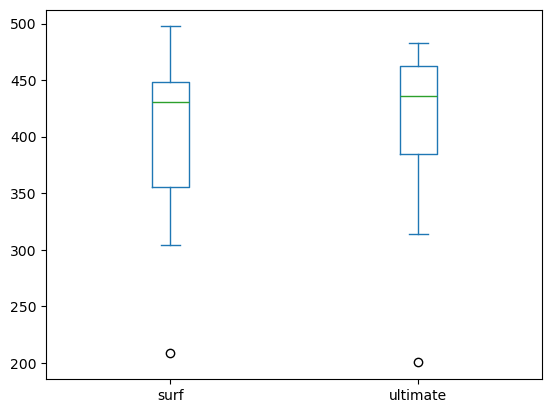

In [34]:
# Plot a boxplot to visualize the distribution of the monthly call duration

all_data_dur_pivot.plot(kind='box')

plt.show()


**Results and Conclusions**
Based on initial analysis of call duration, there does not appear to be meaningful differences when comparing the two plans in terms of average minutes used. However, due to the different plan limits, a sizable portion of Surf plan users go over their monthly limit (500 minutes), whereas Ultimate plan users typically stay far under their monthly limit (3,000 minutes).


### 5.2 Messages

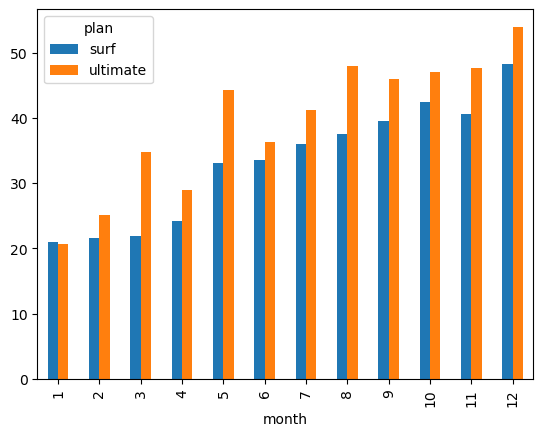

plan,surf,ultimate
month,,
1,21.000000,20.666667
2,21.600000,25.166667
3,21.937500,34.714286
4,24.166667,28.937500
5,33.017857,44.333333
6,33.616438,36.289474
7,35.945055,41.212766
8,37.596774,47.929825
9,39.523179,45.901408


In [35]:
# Compare the number of messages users of each plan tend to send each month

all_data_mgs_pivot = pd.DataFrame(all_data.pivot_table(index='plan', 
                                                   columns='month', 
                                                   values='cnt_msgs',
                                                   aggfunc='mean').T)

all_data_mgs_pivot.plot(kind='bar')
plt.show()
all_data_mgs_pivot

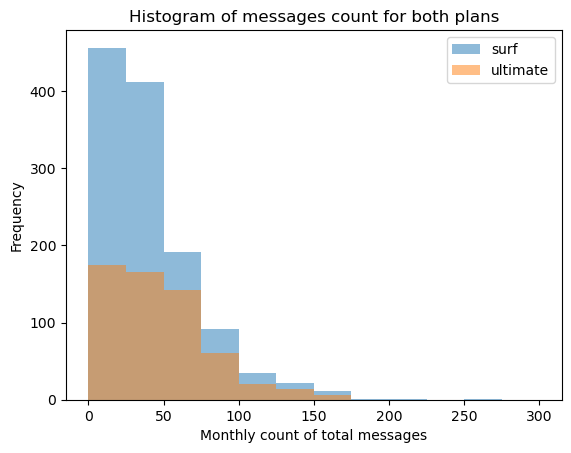

In [36]:
# Comparing the number of messages users of each plan require each month via a histogram.

plt.hist(all_data_surf['cnt_msgs'], alpha=0.5, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])
plt.hist(all_data_ult['cnt_msgs'], alpha=0.5, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])

plt.title('Histogram of messages count for both plans')
plt.legend(['surf', 'ultimate'])
plt.ylabel('Frequency')
plt.xlabel('Monthly count of total messages')
plt.show()

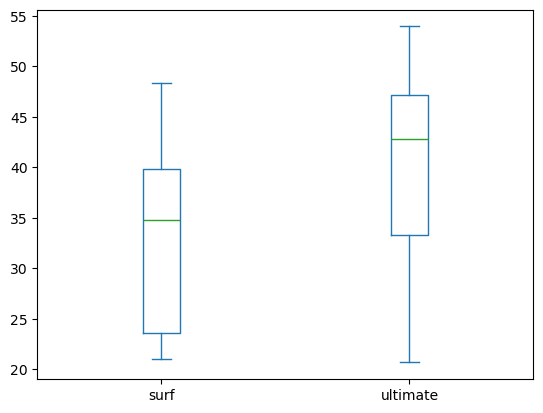

In [37]:
# Plotting a boxplot to visualize the distribution of monthly messages

all_data_mgs_pivot.plot(kind='box')
plt.show()

In [38]:
# Calculating the mean and the variance of monthly messages

print('Average number of messages monthly for each', all_data_mgs_pivot.mean())
print()
print('Variance for each', all_data_mgs_pivot.var())


Average number of messages monthly for each plan
surf        33.309767
ultimate    39.472325
dtype: float64

Variance for each plan
surf         84.264368
ultimate    106.655358
dtype: float64


Based on preliminary analysis, customers with Ultimate plans send slightly more messages than those with Surf plans (33 msgs for Surf plan users vs. 39 for Ultimate). Overall, well over half of Surf plan users use less than the allotted message allowance for their plans (50 messages per month), although a sizable portion go over their monthly allotted limit. By contrast, the vast majority of Ultimate plan users use far less than their allotted amount (1000 messages per month). 

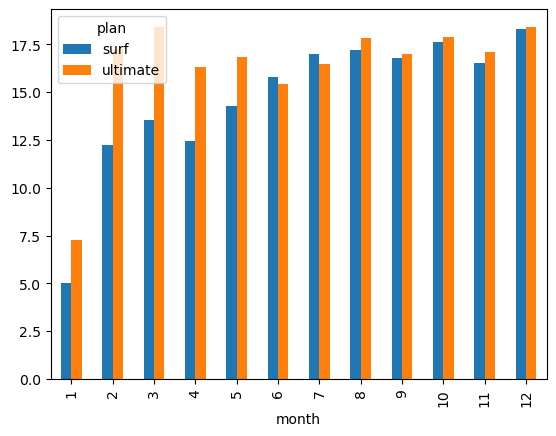

plan,surf,ultimate
month,,
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.469388,16.333333
5,14.302632,16.862069
6,15.810526,15.425532
7,17.016667,16.491525
8,17.201258,17.845070
9,16.777202,17.011628


In [39]:
# Comparing the amount of internet traffic consumed by users per plan
# Using rounded up montly gb totals to calculate based on plan policies

all_data_gb_pivot = pd.DataFrame(all_data.pivot_table(index='plan', 
                                                   columns='month', 
                                                   values='gb_used_rnd',
                                                   aggfunc='mean').T)

all_data_gb_pivot.plot(kind='bar')

plt.show()
all_data_gb_pivot

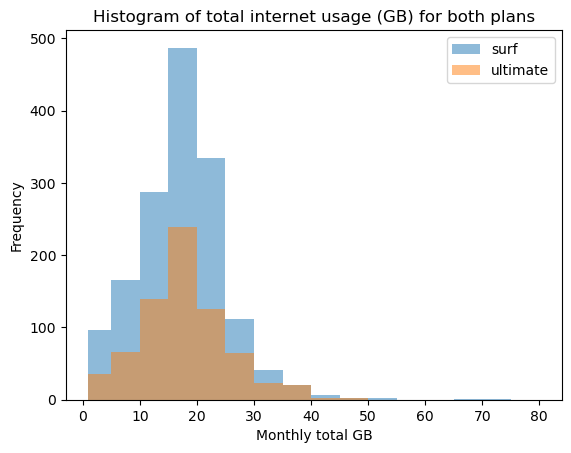

In [40]:
# Comparing monthly internet usage for users of each plan require each month via a histogram.

plt.hist(all_data_surf['gb_used_rnd'], alpha=0.5, bins=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
plt.hist(all_data_ult['gb_used_rnd'], alpha=0.5, bins=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

plt.title('Histogram of total internet usage (GB) for both plans')
plt.legend(['surf', 'ultimate'])
plt.ylabel('Frequency')
plt.xlabel('Monthly total GB')
plt.show()

<Axes: >

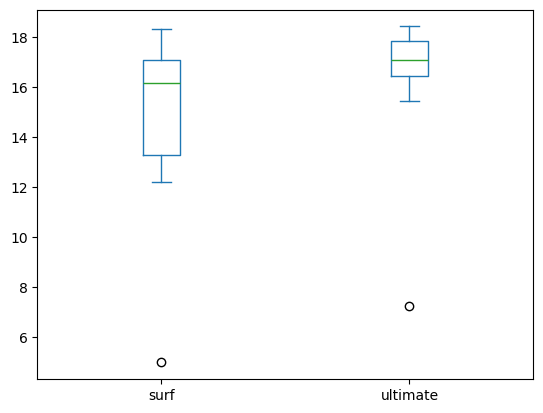

In [41]:
# Plotting a boxplot to visualize the distribution of monthly internet usage

all_data_gb_pivot.plot(kind='box')


In [42]:
# Calculate the mean and the variance of monthly internet usage

print('Average GBs used monthly for each', all_data_gb_pivot.mean())
print()
print('Variance for each', all_data_gb_pivot.var())
print()
print('Avg difference in internet usage:', (all_data_gb_pivot['ultimate'].mean()-all_data_gb_pivot['surf'].mean()).round(1))


Average GBs used monthly for each plan
surf        14.736847
ultimate    16.360226
dtype: float64

Variance for each plan
surf        13.523213
ultimate     8.991420
dtype: float64

Avg difference in internet usage: 1.6


 **Results and Conclusions** 
 
 Based on preliminary analysis, there is a slight difference in the average internet usage when comparing the plans, with Ultimate plan users total monthly usage 1.6 GB higher than Surf plan users. When considering the monthly allotment included in each plan (15 GB for Surf, 30 GB for Ultimate), over half of Surf plan users go over their limit. Although there are some Ultimate plan users that use more than their monthly limit (30 GB), Ultimate plan users typically do not go over that monthly limit. 
 
 Usage of the internet increases over time for Surf plan users based on the monthly usage bar chart, although remains more steady over time for Ultimate plan users. In other words, during the first half of the year, Ultimate plan users use more GBs than Surf plan users on average while the two sets of plan users converge during the second half of the year. Furthermore, Surf plan users remain within the plan limits for the first half of the year while tending to go over during the second half.

### 5.3 Revenue

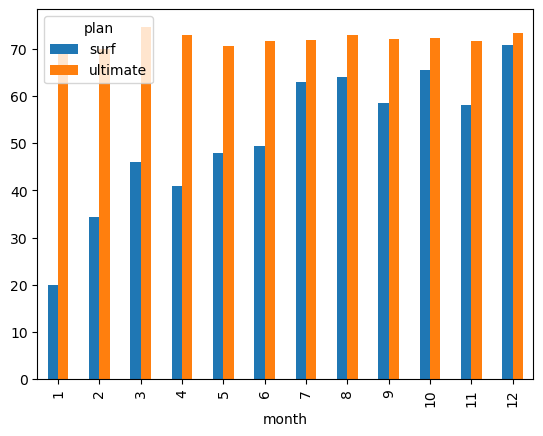

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,34.456667,70.000000
3,45.996087,74.666667
4,40.832400,73.000000
5,47.834286,70.724138
6,49.455052,71.638298
7,62.904628,71.898305
8,64.118765,72.859155
9,58.444845,72.034884


In [43]:
# Compare revenue for each plan per month

all_data_rev_pivot = pd.DataFrame(all_data.pivot_table(index='plan', 
                                                   columns='month', 
                                                   values='revenue',
                                                   aggfunc='mean').T)

all_data_rev_pivot.plot(kind='bar')
plt.show()

all_data_rev_pivot

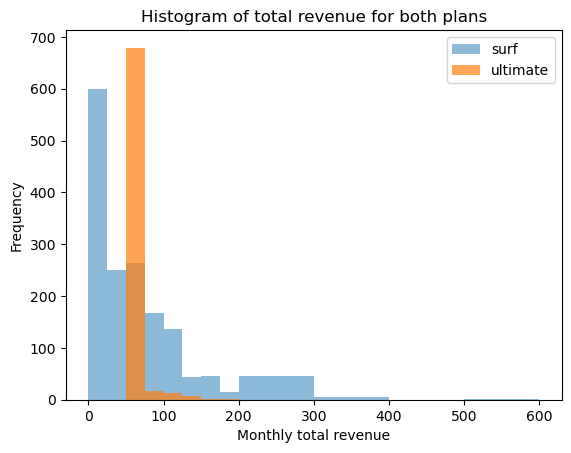

In [44]:
# Comparing monthly revenue for users of each plan via a histogram.

plt.hist(all_data_surf['revenue'], alpha=0.5, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 300, 400, 500, 600])
plt.hist(all_data_ult['revenue'], alpha=0.7, bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 300, 400, 500, 600])

plt.title('Histogram of total revenue for both plans')
plt.legend(['surf', 'ultimate'])
plt.ylabel('Frequency')
plt.xlabel('Monthly total revenue')
plt.show()

<Axes: >

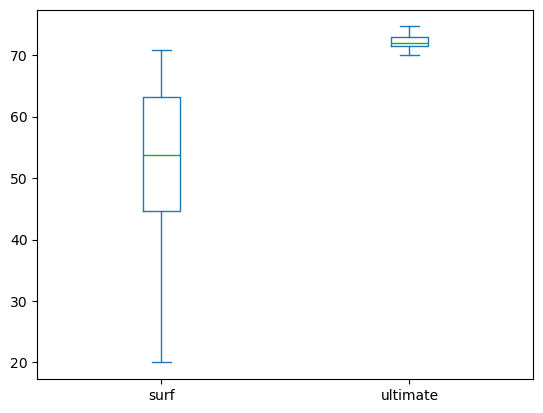

In [45]:
# Plotting a boxplot to visualize the monthly revenue

all_data_rev_pivot.plot(kind='box')

In [46]:
# Calculate the mean and the variance of monthly revenue

print('Average monthly revenue for each', all_data_rev_pivot.mean())
print()
print('Variance for each', all_data_rev_pivot.var())
print()
print('Avg difference in revenue:', (all_data_rev_pivot['ultimate'].mean()-all_data_rev_pivot['surf'].mean()).round(2))

Average monthly revenue for each plan
surf        51.552499
ultimate    72.011068
dtype: float64

Variance for each plan
surf        217.982458
ultimate      1.860681
dtype: float64

Avg difference in revenue: 20.46


 **Results and Conclusions** 
 Revenue for Ultimate plan holders is on average around \\$20.46 higher than for Surf plan holders. This is particularly true for the first half of the year, although revenue levels converge somewhat over time. Even with the converging revenue levels, the Ultimate plan consistently returns higher revenue than the Surf plan. 
 
 The distribution of revenue for each plan looks similar, i.e., concentrated amount of revenue for the base plan for each group (\\$20 for Surf plan holders and \\$70 for Ultimate plan holders) tapering off significant for each group after that initial amount (right skewed distribtuion). However, Ultimate plan holders are more concentrated around their base plan value (\\$70) than Surf plan holders around theirs (\\$20).
 
 Additional analysis below will check more conclusively whether preliminary conclusions are statistically significant.

## 6 Test statistical hypotheses

Based on previous analysis above, the average revenue for users of the Surf plan was lower than for users of the Ultimate plan. To further test whether that difference could be due to random differences or is statistically significant, further analysis will be conducted below comparing revenue between the two plans.

To test whether the difference in revenue is statistically significant, a t-test will be conducted comparing the two groups of users for a 99% confidence level (i.e., alpha = 0.01). The null hypothesis is that the two plans are not significantly different; the alternative hypothesis is that there is a statistically significant difference between the two plans.

In [47]:
# Test the hypotheses

# Creating subsets of the data for surf and ultimate plans
sample_surf = all_data[all_data['plan'] == 'surf']['revenue']
sample_ultimate = all_data[all_data['plan'] == 'ultimate']['revenue']

# Setting alpha at 0.01 to provide a more robust confidence level
alpha = 0.01

# Running t-test for two independent samples and printing results
results = st.ttest_ind(sample_surf, sample_ultimate, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  9.430219968963033e-15
We reject the null hypothesis


Another analysis will be conducted to determine whether Megaline customers are different in different locations. Specifically, revenue from customers in the New York/New Jersey location will be compared with users in all other locations to determine whehter NY/NJ users are distinct.

To test whether the two groups are statistically different, a t-test will be conducted comparing the two groups of users for a 99% confidence level (i.e., alpha = 0.01). The null hypothesis is that users in the NY/NJ area are not significantly different from users in other locations; the alternative hypothesis is that there is a statistically significant difference between the groups.

In [48]:
# Test the hypotheses

# Creating subsets of the data for NY/NJ and other regions

all_data_location = all_data.merge(users, how='left').drop(columns=['first_name', 
                                                                    'last_name', 
                                                                    'age', 
                                                                    'reg_date', 
                                                                    'churn_date'])

def loc(row):
    if 'NY-NJ' in row['city']:
        state = 'NYNJ'
    else:
        state = 'other'        
    return state
    
all_data_location['state'] = all_data_location.apply(loc, axis=1)

all_data_location_NJNY = all_data_location[all_data_location['state'] == 'NYNJ']['revenue']
all_data_location_other = all_data_location[all_data_location['state'] == 'other']['revenue']

print('Average NY-NJ revenue:', all_data_location_NJNY.mean().round(2))
print("Average other locations' revenue:", all_data_location_other.mean().round(2))
print("Difference in revenue:", (all_data_location_other.mean() - all_data_location_NJNY.mean()).round(2))
print()
print('Variance NY-NJ revenue:', all_data_location_NJNY.var())
print("Variance other locations' revenue:", all_data_location_other.var())
print()

# Setting alpha at 0.01 to provide a more robust confidence level
alpha = 0.01

# Running t-test for two independent samples and printing results
results_loc = st.ttest_ind(all_data_location_NJNY, all_data_location_other, equal_var=False)

print('p-value: ', results_loc.pvalue)

if results_loc.pvalue < alpha:
    print("We reject the null hypothesis at a 99% confidence interval")
else:
    print("We can't reject the null hypothesis at a 99% confidence interval")


Average NY-NJ revenue: 60.08
Average other locations' revenue: 65.35
Difference in revenue: 5.27

Variance NY-NJ revenue: 1897.8185656738547
Variance other locations' revenue: 2229.6983584786153

p-value:  0.03475483758221532
We can't reject the null hypothesis at a 99% confidence interval


**Results and Conclusions** 
An independent sample t-test was conducted to compare the average revenue for NY/NJ customers with that of customers for other locations. The results indicated a statistically significant difference at a 95% confidence interval but not at a 99% confidence level (p=0.03). NY/NJ customers (avg revenue = \\$60.08) on average bring in \\$5.27 less in revenue than other locations (\\$65.35) that is statistically significant at the 95% confidence interval.

## General conclusion

For this project, five linked data sets pertaining to two Megaline plans (Surf and Ultimate) and a sample of customers were analyzed to determine which plan was most profitable. The following steps were taken for data preparation and analysis:
1. Data was uploaded and reviewed for basic information about each data set.
2. Data was reviewed to ensure appropriate data types and to ensure there was no inappropriate missing or duplicate data.
3. Calls were rounded up to the nearest minute based on the plan specifics, and 0 second calls were changed to 1 minute under the assumption that any calls would be charged at least 1 minute. Internet usage was rounded up to the nearest GB for each month for each customer and that number was used for analysis.
4. Data was aggregated at the customer level for each month and a single data set compiled for each customer per month that included all plan components (e.g., number of messages for each customer by month).
5. Exploratory analysis was conducted on each aspect of the mobile plans to determine whether there were differences in plan usage (customer behavior) or revenue when comparing the Surf and Ultimate plans.
6. Independent t-tests were conducted to compare whether there were significant differences in revenue between a) Surf and Ultimate plans, and b) customers in NY/NJ vs. other locations.

**Results**

There are some differences between plan users, although the differences are small. In general, surf plan users use most or just over their monthly allotment for each plan category (e.g., messages, internet, calls), while Ultimate plan users on average use far less than their allotted amount. Specifically when comparing Surf and Ultimate plans:
* There are very small to no differences in the number of call minutes customers use (400 avg minutes per month for Surf vs. 407 for Ultimate);
* There are small differences in the average number of messages users send (33 messages per month for Surf plan customers vs. 29 for Ultimate plan users), although both groups typically stay under the Surf plan allotment;
* There are modest differences in the average use of internet (14.7 GB for Surf vs. 16.4 GB for Ultimate) and a sizable portion of Surf plan users go over their limit by 1-3 GB per month, particularly in the second half of the 12 month period analyzed;
* Surf plan holders are more likely to go over their plan limits than Ultimate plan users across all categories (minutes, messages, internet), although that does not necessarily result in higher revenue overall for Megaline (see next bullet point).
* Revenue for Ultimate plan users was on average \\$20.46 higher than for Surf plan users (\\$55.52 avg revenue for Surf vs. \\$72.01 for Ultimate). The difference reduced over time but was consistently higher for the Ultimate plan throughout the year of data analyzed. This was statistically significant at the 99\% interval level (p=9.43e-15).
* Average revenue for customers in NY/NJ was slightly lower (\\$60.08) than customers in other locations (\\$65.35), statistically significant at a 95% interval level (p=0.03).

**Conclusions**

There is value in encouraging users to sign up for the Ultimate plan from a revenue perspective as that will generally result in higher revenue for Megaline. There would be value in further analyzing customers across various locations to determine whether other specific locations are distinct based on revenue.